In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev
from sklearn.metrics import classification_report, cohen_kappa_score, accuracy_score, recall_score, f1_score, precision_score


White Wine: 


'Count Sum: 4898'

,quality_label,Counts
1,low,1640
0,medium,3078
2,high,180


Red Wine: 


'Count Sum: 1599'

,quality_label,Counts
1,low,744
0,medium,837
2,high,18


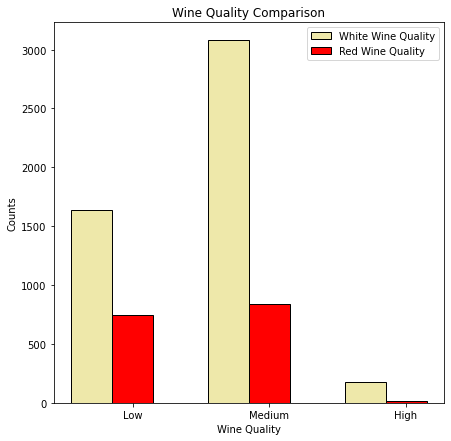

In [435]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])  

white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

# plot Wine Quality
White_Quality = white_wine[["quality_label"]].value_counts().reset_index(name="Counts").sort_values(by=["quality_label"])
Red_Quality = red_wine[["quality_label"]].value_counts().reset_index(name="Counts").sort_values(by=["quality_label"])

#Red_Quality = pd.DataFrame(red_wine['quality_label'].value_counts().sort_index()) 
#White_Quality = pd.DataFrame(white_wine['quality_label'].value_counts().sort_index())
print("White Wine: ")
display("Count Sum: %d" % White_Quality["Counts"].sum(), White_Quality)  
print("Red Wine: ")
display("Count Sum: %d" % Red_Quality["Counts"].sum(), Red_Quality)

# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = White_Quality["Counts"]
 
# Choose the height of the cyan bars
bars2 = Red_Quality["Counts"]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Plot size and Title
plt.figure(figsize=(7,7))
plt.title("Wine Quality Comparison") 

# Create white bars
plt.bar(r1, bars1, width = barWidth, color = 'PaleGoldenROd', edgecolor = 'black', capsize=7, label='White Wine Quality')
 
# Create red bars
plt.bar(r2, bars2, width = barWidth, color = 'Red', edgecolor = 'black', capsize=7, label='Red Wine Quality')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Low', 'Medium', 'High'])
plt.ylabel('Counts')
plt.xlabel('Wine Quality')
plt.legend()
 
# Show graphic
plt.show()


In [382]:
#use the ScikitLearn library, especially the sklearn.preprocessing package, 
#to transform raw features into a representation that is more suitable for ML models

In [383]:
#TRAINING

#The One-Hot Encoder converts each category value into a new column and assigns a 1 or 0 (True/False) value to the corresponding column. 
#The encoder prevents the model from weighting a value improperly. To illustrate this, 
#if we have a list of wines, a wine of the category "white" will have 0 in the "red" and a 1 in the "white" category. 
#As you can see, these categories are nominal

#We imported the make_column_transformer() function
#The function took a tuple containing the transformer we want to apply and the column to which to apply to. 
#In this case, we wanted to use the OneHotEncoder() transformer and apply it to the 'island' column.
#We used the remainder='passthrough' parameter to specify that all other columns should be left untouched.
#We then applied the .fit_transform() method to our DataFrame.
#Finally, we reconstructed the DataFrame

transformer = make_column_transformer((OneHotEncoder(), ['wine_type']),remainder='passthrough')
transformed = transformer.fit_transform(wines)
transformed_wines = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

transformed_wines.head()

,onehotencoder__wine_type_red,onehotencoder__wine_type_white,remainder__fixed acidity,remainder__volatile acidity,remainder__citric acid,remainder__residual sugar,remainder__chlorides,remainder__free sulfur dioxide,remainder__total sulfur dioxide,remainder__density,remainder__pH,remainder__sulphates,remainder__alcohol,remainder__quality,remainder__quality_label
0,0.0,1.0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.9942,3.26,0.38,12.2,8,high
1,1.0,0.0,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.9956,3.27,0.45,9.9,5,low
2,0.0,1.0,6.8,0.39,0.34,7.4,0.02,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium
3,0.0,1.0,6.3,0.28,0.47,11.2,0.04,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium
4,0.0,1.0,7.4,0.35,0.2,13.9,0.054,63.0,229.0,0.99888,3.11,0.5,8.9,6,medium


In [384]:
#Dummy variables in statistics:
#The Wine type column contain categorical values. We can convert the values in the Wine type column into one-hot encoded vectors 
#using the get_dummies() function

x = pd.get_dummies(wines.wine_type, prefix='Wine_type')

#We passed Wine type as the value for the prefix attribute of the get_dummies() method, 
#hence you can see the string wine type prefixed before the header of each of the one-hot encoded columns in the output.
print(x.head())

   Wine_type_red  Wine_type_white
0              0                1
1              1                0
2              0                1
3              0                1
4              0                1


In [385]:
red_wine_df = pd.DataFrame(red_wine , columns=["quality_label"])
white_wine_df = pd.DataFrame(white_wine , columns=["quality_label"])

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
red_wine_df['Red-Wine_Quality_Cat'] = labelencoder.fit_transform(red_wine_df["quality_label"])
white_wine_df['Red-Wine_Quality_Cat'] = labelencoder.fit_transform(white_wine_df["quality_label"])

wine_enc_comp = pd.concat([red_wine_df,white_wine_df],axis=1 )
wine_enc_comp

,quality_label,Red-Wine_Quality_Cat,quality_label,Red-Wine_Quality_Cat
0,low,1.0,medium,2
1,low,1.0,medium,2
2,low,1.0,medium,2
3,medium,2.0,medium,2
4,low,1.0,medium,2
...,...,...,...,...
4893,NaN,NaN,medium,2
4894,NaN,NaN,low,1
4895,NaN,NaN,medium,2
4896,NaN,NaN,medium,2


In [386]:
#Dummy variables

red_wine_df = pd.DataFrame(red_wine , columns=["quality_label"])
white_wine_df = pd.DataFrame(white_wine , columns=["quality_label"])

# generate binary values using get_dummies
dum_red_df = pd.get_dummies(red_wine_df, columns=["quality_label"], prefix=["Red_Quality"] )
dum_white_df = pd.get_dummies(white_wine_df, columns=["quality_label"], prefix=["White_Quality"] )

# merge with main df dum_red_df on key values
red_wine_df = red_wine_df.join(dum_red_df)
white_wine_df = white_wine_df.join(dum_white_df)

wine_dum_comp = pd.concat([red_wine_df,white_wine_df],axis=1 )
wine_dum_comp

,quality_label,Red_Quality_low,Red_Quality_medium,Red_Quality_high,quality_label,White_Quality_low,White_Quality_medium,White_Quality_high
0,low,1.0,0.0,0.0,medium,0,1,0
1,low,1.0,0.0,0.0,medium,0,1,0
2,low,1.0,0.0,0.0,medium,0,1,0
3,medium,0.0,1.0,0.0,medium,0,1,0
4,low,1.0,0.0,0.0,medium,0,1,0
...,...,...,...,...,...,...,...,...
4893,NaN,NaN,NaN,NaN,medium,0,1,0
4894,NaN,NaN,NaN,NaN,low,1,0,0
4895,NaN,NaN,NaN,NaN,medium,0,1,0
4896,NaN,NaN,NaN,NaN,medium,0,1,0


'OneHotEncoder: '

,onehotencoder__wine_type_red,onehotencoder__wine_type_white,remainder__fixed acidity,remainder__volatile acidity,remainder__citric acid,remainder__residual sugar,remainder__chlorides,remainder__free sulfur dioxide,remainder__total sulfur dioxide,remainder__density,remainder__pH,remainder__sulphates,remainder__alcohol
0,0.0,1.0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1,1.0,0.0,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
2,0.0,1.0,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3,0.0,1.0,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4,0.0,1.0,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,1.0,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2
6493,0.0,1.0,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7
6494,0.0,1.0,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5
6495,0.0,1.0,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5


Accuracy score: 98.62
Confusion matrix:


,red,white
red,1450,9
white,18,473


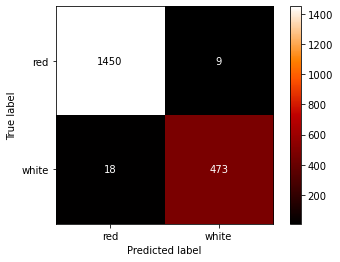

Classification report: 
              precision    recall  f1-score   support

    Red Wine       0.99      0.99      0.99      1459
Not Red Wine       0.98      0.96      0.97       491

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950

Cohen-Kappa score: 0.9630273604554973


In [387]:
# Modelling/OneHotEncoder

wines_mod = wines.drop(["quality", "quality_label"], axis=1) 

#We imported the make_column_transformer() function
#The function took a tuple containing the transformer we want to apply and the column to which to apply to.
transformer = make_column_transformer((OneHotEncoder(), ['wine_type']),remainder='passthrough')

#We then applied the .fit_transform() method to our DataFrame
transformed = transformer.fit_transform(wines_mod)

#Finally, we reconstructed the DataFrame
transformed_wines = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
display("OneHotEncoder: ", transformed_wines)

#--> the features we will keep to build our model
X = transformed [:,2:] 

#y target --> what you're trying to predict
y = transformed [:,0] 

#We split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

#Perform Feature scaling
#(transforms the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values, 
#to avoid the model giving more importance to one variable over the other)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)            

# Fit the model (Logistic Regression)
# ML classification algorithm that is used to predict the probability of a categorical dependent variable. 
# In logistic regression, the dependent variable is a binary variable that contains data coded as 
# 1 (yes, success, etc.) or 0 (no, failure, etc.)

#We define the model
lr = LogisticRegression()
lr.fit(X_train, Y_train)                       

#Make predictions
pred_lr = lr.predict(X_test)

#evaluate model
print("Accuracy score: %.2f" %(accuracy_score(Y_test, pred_lr)*100))

#It measures the quality of predictions from a classification model by looking at how many predictions are True and how many are False.
print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, pred_lr, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, pred_lr, display_labels= ["red", "white"] ,colorbar= True, cmap="gist_heat")
plt.show()

#alternative
#color = ["red", "white"]
#matrix = plot_confusion_matrix(lr, X_test_norm, Y_test, cmap=plt.cm.Reds)
#matrix.ax_.set_title('Confusion Matrix', color=color)
#plt.xlabel('Predicted Label', color=color)
#plt.ylabel('True Label', color=color)
#plt.gcf().axes[0].tick_params(colors=color)
#plt.gcf().axes[1].tick_params(colors=color)
#plt.show()

#Top left quadrant = True Positives = The model predicted that the Wine type is Red and the Wine is red. (TP)
#Bottom right quadrant = True Negatives = The model predicted that the Wine type NOT is Red and the Wine type is NOT Red. (TN)
#Top right quadrant = False Positives = The model predicted that the Wine type is Red and the Wine type is NOT Red. (FP)
#Bottom left quadrant = False Negatives = The model predicted that the Wine type NOT is Red and the the Wine type is red. (FN)

#_________________________________________________________________________________________________________________________________________


#The classification report
print("Classification report: ")
print(classification_report(Y_test, pred_lr, target_names=["Red Wine","Not Red Wine"]))

#measures the quality of predictions from a classification algorithm, reflecting how many predictions are accurate, 
#whether they're true or false. The report also shows the main classification metrics precision, recall and f1-score on a per-class basis
#Precision: Percentage of correct positive predictions relative to *total positive predictions*. Accuracy of positive predictions.
#Precision = TP/(TP + FP)

#Recall: Percentage of correct positive predictions relative to *total actual positives*. Fraction of positives that were correctly identified.
#Recall = TP/(TP+FN)

#F1 Score: The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
#Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, 
#the weighted average of F1 should be used to compare classifier models, not global accuracy.
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)

#_________________________________________________________________________________________________________________________________________

#Cohen-Kappa Score
kappa = cohen_kappa_score(pred_lr, Y_test)
print("Cohen-Kappa score:", kappa)

#Kappa is an important measure of classifier performance, especially on an imbalanced data set and multi-class problems. 
#It expresses the level of agreement between two annotators on a classification problem, one annotator being your ML model, 
#the second classifier being a model that simply guesses at random.

#Here is one possible interpretation of Kappa:
#Poor agreement = Less than 0.20 (including negative numbers)
#Fair agreement = 0.20 to 0.40
#Moderate agreement = 0.40 to 0.60
#Good agreement = 0.60 to 0.80
#Very good agreement = 0.80 to 1.00


'LabelEncoder: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,Wine Type
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,white,1
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,red,0
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,white,1
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,white,1
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,white,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,white,1
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,white,1
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,white,1
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,white,1


Accuracy score: 98.62
Cohen-Kappa score: 0.9630273604554973
Classification report: 
              precision    recall  f1-score   support

    Red Wine       0.98      0.96      0.97       491
  White Wine       0.99      0.99      0.99      1459

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950

Confusion matrix:


,red,white
red,473,18
white,9,1450


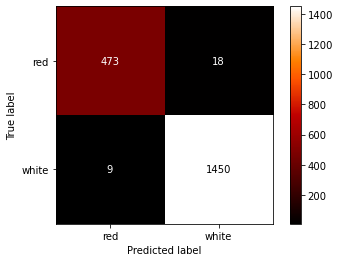

In [388]:
# Modelling/LabelEncoder

wines_modlab = wines.drop(["quality", "quality_label"], axis=1) 

labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
wines_modlab['Wine Type'] = labelencoder.fit_transform(wines_modlab["wine_type"])
display("LabelEncoder: ", wines_modlab)


#--> the features we will keep to build our model
X = wines_modlab.iloc[:,:11]                             
#y target --> what you're trying to predict
y = wines_modlab.iloc[:,-1]                               

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

#Perform Feature scaling
#(transforms the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values, 
#to avoid the model giving more importance to one variable over the other)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)


# Fit the model (Logistic Regression)
# ML classification algorithm that is used to predict the probability of a categorical dependent variable. 
# In logistic regression, the dependent variable is a binary variable that contains data coded as 
# 1 (yes, success, etc.) or 0 (no, failure, etc.)

lr_lab = LogisticRegression()
lr_lab.fit(X_train, Y_train)

# Make predictions
pred_lr = lr_lab.predict(X_test)

#evaluate model
print("Accuracy score: %.2f" %(accuracy_score(Y_test, pred_lr)*100))

#Cohen-Kappa Score
kappa = cohen_kappa_score(pred_lr, Y_test)
print("Cohen-Kappa score:", kappa)

#The classification report
print("Classification report: ")
print(classification_report(Y_test, pred_lr, target_names=["Red Wine","White Wine"]))

# Plot Confusion Matrix
print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, pred_lr, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

color = ["red", "white"]
ConfusionMatrixDisplay.from_predictions(Y_test, pred_lr, display_labels= color ,colorbar= True, cmap="gist_heat")
plt.show()


Accuracy score: 98.62
Cohen-Kappa score: 0.9630273604554973
Classification report: 
              precision    recall  f1-score   support

    Red Wine       0.98      0.96      0.97       491
  White Wine       0.99      0.99      0.99      1459

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950

Confusion matrix visualization:


,red,white
red,473,18
white,9,1450


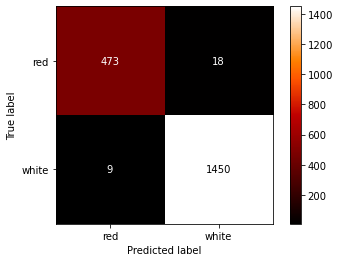

In [389]:
# Modelling/Label Binarizer (Looking if there are differences between Label Binarizer and LabelEncoder)

wines_modbi = wines.drop(["quality", "quality_label"], axis=1) 

lb = preprocessing.LabelBinarizer()

# We transform the wine type column variables into binary and add the column to the dataframe
wines_modbi["Wine Type Binary"] = lb.fit_transform(wines_modbi["wine_type"])

# Now we split the dataset into input and output
X = wines_modbi.iloc[:,:-2]
y = wines_modbi.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.3, shuffle= True, random_state=1)

# Perform Feature scaling
#(transforms the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values, 
#to avoid the model giving more importance to one variable over the other)
# #we fit the scaler on the training data
norm = MinMaxScaler().fit(X_train,Y_train)

# then we transform the training data
X_train = norm.transform(X_train)

# then we transform the testing data
X_test = norm.transform(X_test)

#After preparing the model, we are ready to implement the ML model

#defining the classification model
lr = LogisticRegression(max_iter= 200)

#fitting the model on the training set
lr.fit(X_train, Y_train)

#Now we are ready to predict
lr_predict = lr.predict(X_test)

#evaluate model
print("Accuracy score: %.2f" %(accuracy_score(Y_test, lr_predict)*100))

#Cohen-Kappa Score
kappa = cohen_kappa_score(lr_predict, Y_test)
print("Cohen-Kappa score:", kappa)

#The classification report
print("Classification report: ")
print(classification_report(Y_test, lr_predict, target_names=["Red Wine","White Wine"]))

# Plot Confusion Matrix
color = ["red", "white"]
ConfusionMatrixDisplay.from_predictions(Y_test, lr_predict, display_labels= color ,colorbar= True, cmap="gist_heat",)

print("Confusion matrix visualization:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, lr_predict, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)


Number of mislabeled points out of a total 2165 points : 22
Accuracy score: 98.98
Confusion matrix:


,red,white
red,514,19
white,3,1629


Confusion Matrix after using Startified KFOLD:


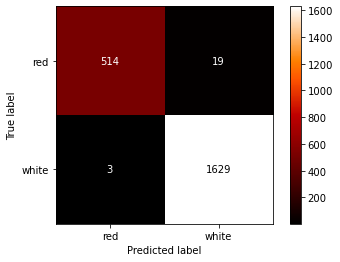

In [390]:
X = wines_modbi.iloc[:,:-2]
y = wines_modbi.iloc[:,-1]

#defining the classification model
lr = LogisticRegression()

# Now we create a StratifiedKFold object with 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

accu_score = []

# Now we are ready to use the function to create our folds
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    #Now its time to normalise our input features with normalisation technique
    scaler = preprocessing.MinMaxScaler().fit(X_train)  #we want to fit the scaler, in this case, minmax, to the training data
    
    #then I apply it to the train & test data       
    X_train_scaled = scaler.transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 

    lr.fit(X_train_scaled, Y_train)
    y_pred = lr.predict(X_test_scaled)


print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Accuracy score: %.2f" %(accuracy_score(Y_test, y_pred)*100))

print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

# Visualize the Confusion Matrix
print("Confusion Matrix after using Startified KFOLD:")
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred, display_labels= ["red", "white"] ,colorbar= True, cmap="gist_heat")

plt.show()

In [391]:
X = wines_modbi.iloc[:,:-2]
y = wines_modbi.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.3, shuffle= True, random_state=1)

# Perform Feature scaling
#we fit the scaler on the training data
norm = MinMaxScaler().fit(X_train,Y_train)

# then we transform the training data
X_train = norm.transform(X_train)

# then we transform the testing data
X_test = norm.transform(X_test)

# Define the Model, Naive Bayes
gnb = GaussianNB()

y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Accuracy score: %.2f" %(accuracy_score(Y_test, y_pred)*100))

print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

Number of mislabeled points out of a total 1950 points : 46
Accuracy score: 97.64
Confusion matrix:


,red,white
red,476,15
white,31,1428


In [392]:
X = wines_modbi.iloc[:,:-2]
y = wines_modbi.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.3, shuffle= True, random_state=1)

# we fit the scaler on the training data
norm = MinMaxScaler().fit(X_train,Y_train)

# then we transform the training data
X_train = norm.transform(X_train)

# then we transform the testing data
X_test = norm.transform(X_test)

# Define the Model, Decision Trees
DTree = DecisionTreeClassifier()

y_pred = DTree.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Accuracy score: %.2f" %(accuracy_score(Y_test, y_pred)*100))

print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

Number of mislabeled points out of a total 1950 points : 33
Accuracy score: 98.31
Confusion matrix:


,red,white
red,473,18
white,15,1444


In [393]:
X = wines_modbi.iloc[:,:-2]
y = wines_modbi.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.3, shuffle= True, random_state=1)

# we fit the scaler on the training data
norm = MinMaxScaler().fit(X_train,Y_train)

# then we transform the training data
X_train = norm.transform(X_train)

# then we transform the testing data
X_test = norm.transform(X_test)

# Define the Model support vector machine (SVM)  (Simple SVC used to find decision boundary for linearly separable data)
svclassifier = SVC()

y_pred = svclassifier.fit(X_train, Y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Accuracy score: %.2f" %(accuracy_score(Y_test, y_pred)*100))

print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

Number of mislabeled points out of a total 1950 points : 13
Accuracy score: 99.33
Confusion matrix:


,red,white
red,483,8
white,5,1454


In [394]:
X = wines_modbi.iloc[:,:-2]
y = wines_modbi.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.3, shuffle= True, random_state=1)

# we fit the scaler on the training data
norm = MinMaxScaler().fit(X_train,Y_train)

# then we transform the training data
X_train = norm.transform(X_train)

# then we transform the testing data
X_test = norm.transform(X_test)

# Define the Model Random Forest
#rf = RandomForestRegressor(n_estimators=200)
rf = RandomForestClassifier(n_estimators=200)

y_pred = rf.fit(X_train, Y_train).predict(X_test)

print("Accuracy score: %.2f" %(accuracy_score(Y_test, y_pred)*100))
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, y_pred, labels=labels)
a = pd.DataFrame(a, index=("red", "white"), columns=("red", "white"))
display(a)

#print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

#importances = rf.feature_importances_
#columns = x.columns
#i= 0
#while i < len(columns):
#    print(f" The importance of feature '{columns[i]}' is {round (importances[i] * 100, 2)}%.")
#   i +=1

Accuracy score: 99.44
Number of mislabeled points out of a total 1950 points : 11
Confusion matrix:


,red,white
red,483,8
white,3,1456


Accuracy LR: 0.985046 (Std: 0.002964)
Accuracy KNN: 0.989664 (Std: 0.001889)
Accuracy DCT: 0.981966 (Std: 0.002711)
Accuracy RDF: 0.994282 (Std: 0.002038)
Accuracy NB: 0.974709 (Std: 0.003106)
Accuracy SVC: 0.994062 (Std: 0.001941)


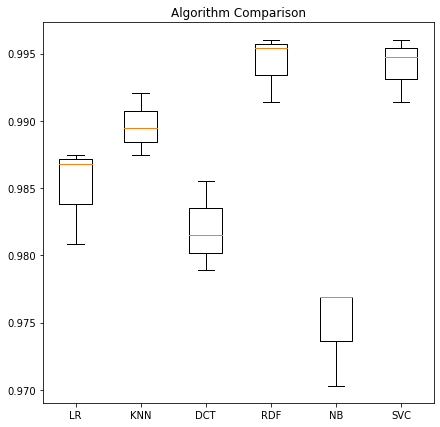

In [405]:
# All models in one code

X = wines_modbi.iloc[:,:-2]
y = wines_modbi.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.3, shuffle= True, random_state=1)

# we fit the scaler on the training data
norm = MinMaxScaler().fit(X_train,Y_train)

# then we transform the training data
X_train = norm.transform(X_train)

# then we transform the testing data
X_test = norm.transform(X_test)

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DCT', DecisionTreeClassifier()))
models.append(('RDF', RandomForestClassifier(n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('Accuracy %s: %f (Std: %f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.figure(figsize=(7,7))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

'LabelEncoder: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,Quality Label Encoded
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,low,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,medium,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,low,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,medium,2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,Quality Label Encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low,1


Accuracy score: 73.33
Number of mislabeled points out of a total 480 points : 128
Cohen-Kappa score: 0.4807828820606429
Classification report: 
              precision    recall  f1-score   support

        high       0.09      0.33      0.14         3
      medium       0.75      0.73      0.74       230
         low       0.75      0.74      0.74       247

    accuracy                           0.73       480
   macro avg       0.53      0.60      0.54       480
weighted avg       0.74      0.73      0.74       480

Confusion matrix:


,high,medium,low
high,1,0,2
medium,2,168,60
low,8,56,183


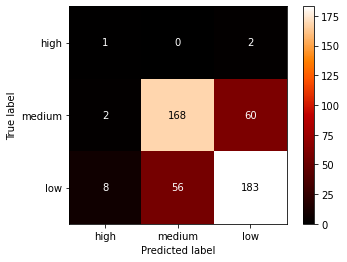

In [430]:
# Modelling Wine Quality

red_wine_modlab = red_wine.drop(["quality", "wine_type"], axis=1) 

labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
red_wine_modlab['Quality Label Encoded'] = labelencoder.fit_transform(red_wine_modlab["quality_label"])
display("LabelEncoder: ", red_wine_modlab.tail(),red_wine_modlab.head())

#--> the features we will keep to build our model
X = red_wine_modlab.iloc[:,:11]      
                      
#y target --> what you're trying to predict
y = red_wine_modlab.iloc[:,12] 

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)


# Fit the model (Logistic Regression)
# ML classification algorithm that is used to predict the probability of a categorical dependent variable. 
# In logistic regression, the dependent variable is a binary variable that contains data coded as 
# 1 (yes, success, etc.) or 0 (no, failure, etc.)

#LogisticRegression()
#KNeighborsClassifier()
#DecisionTreeClassifier()
#RandomForestClassifier(n_estimators=200)
#GaussianNB()
#SVC()

lr_lab = DecisionTreeClassifier()
lr_lab.fit(X_train, Y_train)

# Make predictions
pred_lr = lr_lab.predict(X_test)

#evaluate model
print("Accuracy score: %.2f" %(accuracy_score(Y_test, pred_lr)*100))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != pred_lr).sum()))

#Cohen-Kappa Score
kappa = cohen_kappa_score(pred_lr, Y_test)
print("Cohen-Kappa score:", kappa)

#The classification report
print("Classification report: ")
print(classification_report(Y_test, pred_lr, target_names=["high", "medium", "low"]))

# Plot Confusion Matrix
label = ["high", "medium", "low"]
ConfusionMatrixDisplay.from_predictions(Y_test, pred_lr, display_labels= label ,colorbar= True, cmap="gist_heat")

print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, pred_lr, labels=labels)
a = pd.DataFrame(a, index=("high", "medium", "low"), columns=("high", "medium", "low"))
display(a)

'LabelEncoder: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,Quality Label Encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low,1


Accuracy Mean LR: 0.721156 (Std: 0.018802)
Accuracy Mean KNN: 0.696156 (Std: 0.046483)
Accuracy Mean DCT: 0.693498 (Std: 0.032075)
Accuracy Mean RDF: 0.772105 (Std: 0.014603)
Accuracy Mean NB: 0.706875 (Std: 0.015479)
Accuracy Mean SVC: 0.739906 (Std: 0.027291)


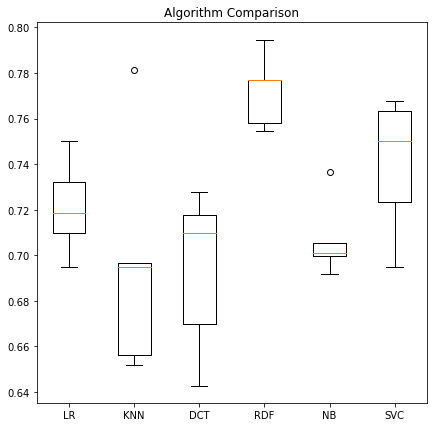

In [424]:
red_wine_modlab = red_wine.drop(["quality", "wine_type"], axis=1) 

labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
red_wine_modlab['Quality Label Encoded'] = labelencoder.fit_transform(red_wine_modlab["quality_label"])
display("LabelEncoder: ", red_wine_modlab.head())

#--> the features we will keep to build our model
X = red_wine_modlab.iloc[:,:11]      
                      
#y target --> what you're trying to predict
y = red_wine_modlab.iloc[:,12] 

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)

# apply models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DCT', DecisionTreeClassifier()))
models.append(('RDF', RandomForestClassifier(n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

#lr_lab = models

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('Accuracy Mean %s: %f (Std: %f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.figure(figsize=(7,7))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()	

'LabelEncoder: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,Quality Label Encoded
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,medium,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,low,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,medium,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,medium,2
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,medium,2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,Quality Label Encoded
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,2


Accuracy score: 70.68
Number of mislabeled points out of a total 1470 points : 431
Classification report: 
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        48
      medium       0.64      0.46      0.54       481
         low       0.73      0.87      0.79       941

    accuracy                           0.71      1470
   macro avg       0.46      0.44      0.44      1470
weighted avg       0.68      0.71      0.68      1470

Confusion matrix:


/Users/linhvu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/linhvu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/linhvu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,high,medium,low
high,0,0,48
medium,0,223,258
low,0,125,816


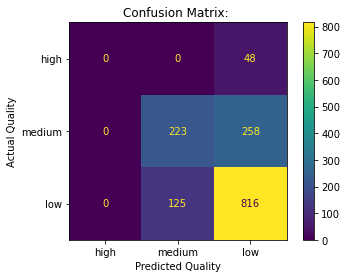

In [398]:
white_wine_modlab = white_wine.drop(["quality", "wine_type"], axis=1) 

labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
white_wine_modlab['Quality Label Encoded'] = labelencoder.fit_transform(white_wine_modlab["quality_label"])
display("LabelEncoder: ", white_wine_modlab.tail(),white_wine_modlab.head() )

#--> the features we will keep to build our model
X = white_wine_modlab.iloc[:,:11]      
                      
#y target --> what you're trying to predict
y = white_wine_modlab.iloc[:,12] 

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)

# ML Model
lr_lab = LogisticRegression()
lr_lab.fit(X_train, Y_train)

# Make predictions
pred_lr = lr_lab.predict(X_test)

#evaluate model
print("Accuracy score: %.2f" %(accuracy_score(Y_test, pred_lr)*100))

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != pred_lr).sum()))

#The classification report
print("Classification report: ")
print(classification_report(Y_test, pred_lr, target_names=["high", "medium", "low"]))

# Plot Confusion Matrix
label = ["high", "medium", "low"]
#ConfusionMatrixDisplay.from_predictions(Y_test, pred_lr, display_labels= label ,colorbar= True, cmap="hot")

cm = confusion_matrix(Y_test, pred_lr)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=label)
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix: ', 
                xlabel='Predicted Quality', 
                ylabel='Actual Quality')

print("Confusion matrix:")
labels = np.unique(Y_test)
a = confusion_matrix(Y_test, pred_lr, labels=labels)
a = pd.DataFrame(a, index=("high", "medium", "low"), columns=("high", "medium", "low"))
display(a)

'LabelEncoder: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,Quality Label Encoded
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,medium,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,low,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,medium,2
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,medium,2
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,medium,2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,Quality Label Encoded
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,2


Accuracy LR: 0.714991 (Std: 0.009055)
Accuracy KNN: 0.706530 (Std: 0.018699)
Accuracy DCT: 0.712957 (Std: 0.022217)
Accuracy RDF: 0.789382 (Std: 0.017123)
Accuracy NB: 0.665402 (Std: 0.013648)
Accuracy SVC: 0.733074 (Std: 0.013859)


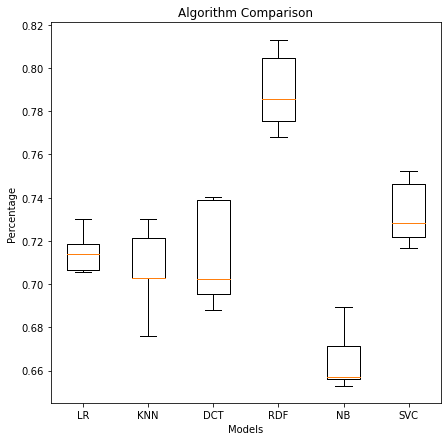

In [414]:
white_wine_modlab = white_wine.drop(["quality", "wine_type"], axis=1) 

labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
white_wine_modlab['Quality Label Encoded'] = labelencoder.fit_transform(white_wine_modlab["quality_label"])
display("LabelEncoder: ", white_wine_modlab.tail(),white_wine_modlab.head() )

#--> the features we will keep to build our model
X = white_wine_modlab.iloc[:,:11]      
                      
#y target --> what you're trying to predict
y = white_wine_modlab.iloc[:,12] 

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size= 0.30, random_state= 1, shuffle= True)

# fit scaler on training data
norm = MinMaxScaler().fit(X_train,Y_train)
# transform training data
X_train = norm.transform(X_train)
# transform testing data
X_test = norm.transform(X_test)

# evaluate each model in turn
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DCT', DecisionTreeClassifier()))
models.append(('RDF', RandomForestClassifier(n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('Accuracy %s: %f (Std: %f)' % (name, (cv_results.mean()), cv_results.std()))

# Compare Algorithms
plt.figure(figsize=(7,7))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.show()